# Exploring AirBnB in Europe

A lot has been said and written about the effect of AirBnB around the world. In this assignment, you will use the data collected by [Inside AirBnB](http://insideairbnb.com).

Once you do that, spend some time familiarizing yourself with the data and then go ahead and do the following tasks. In the following questions, you will use data for the following cities:

* Amsterdam

* Athens

* Barcelona

* Berlin

* Copenhagen

* Dublin

* Lisbon

* London

* Madrid

* Paris

* Rome

* Venice

* Vienna

You will use the data for the latest 12 months period for which data is available.

## Imports

In [ ]:
pip install altair pandas ipywidgets

In [264]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets
from IPython.display import display, HTML

## **Initial Data Import**

### **Data Collection**

To gather the most recent Airbnb data for each city over the past 12 months, we followed a careful process:

1. **Identifying Relevant Time Frames**  
   We utilized the **Inside Airbnb** platform, which provides regularly updated listings data for cities worldwide. We referenced datasets from **multiple dates** within the last 12 months to ensure we had the most up-to-date information for each city.

2. **Selecting Key Dates**  
   We defined a list of cities and requested data from **four key dates** within the past year. This gave us a comprehensive snapshot of the Airbnb listings across different periods, allowing for better analysis.

3. **Combining Datasets**  
   For each city, we fetched the datasets corresponding to the selected dates and **combined them** while ensuring that **duplicate listings** were removed. This helped maintain the **accuracy and quality** of the data.
   
---

### **Data Cleaning Process**

We performed data cleaning at the beginning of the analysis to ensure the dataset was **consistent** and **reliable**, which is crucial for making accurate comparisons across cities. Below are the key reasons for and steps involved in the cleaning process:

- **Ensuring Consistency**  
  We started by cleaning the data to eliminate any **inconsistencies** or **errors** that could skew the results. This allowed us to perform a valid comparison between cities and accurately analyze the trends in the Airbnb market.

- **Handling Missing or Irregular Values**  
  Although the **Inside Airbnb dataset** acknowledges certain **inconsistencies**, we opted to address them proactively. 

- **Removing Duplicates**  
  Duplicate listings were removed to ensure that our analysis reflected only unique listings, preventing the potential inflation of numbers.

- **Filtering Invalid Data**  
  We removed rows with **non-positive prices**, invalid **minimum nights**, or negative **review counts** to ensure that all values used in our analysis were valid and made sense.

---

By performing these cleaning steps, we were able to ensure the highest level of **data quality** and **consistency**, allowing for accurate and reliable comparisons across cities. Even though some of these cleaning steps may not have been strictly required due to known dataset inconsistencies, they helped provide an extra layer of **certainty** in our analysis.

In [314]:
# List of cities
cities = ["Amsterdam", "Athens", "Barcelona", "Berlin", "Copenhagen", 
          "Dublin", "Lisbon", "London", "Madrid", "Paris", "Rome", 
          "Venice", "Vienna"]

# Dictionary of cities with their base URLs and dates
city_dates = {
    "Amsterdam": {
        "base_url": "https://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/{}/visualisations/listings.csv",
        "dates": ["2024-09-05", "2024-06-10", "2024-03-11", "2023-12-12"]
    },
    "Athens": {
        "base_url": "https://data.insideairbnb.com/greece/attica/athens/{}/visualisations/listings.csv",
        "dates": ["2024-06-26", "2024-03-28", "2023-12-25", "2023-09-21"]
    },
    "Barcelona": {
        "base_url": "https://data.insideairbnb.com/spain/catalonia/barcelona/{}/visualisations/listings.csv",
        "dates": ["2024-09-06", "2024-06-15", "2024-03-20", "2023-12-13"]
    },
    "Berlin": {
        "base_url": "https://data.insideairbnb.com/germany/be/berlin/{}/visualisations/listings.csv",
        "dates": ["2024-06-22", "2024-03-24", "2023-12-18"]
    },
    "Copenhagen": {
        "base_url": "https://data.insideairbnb.com/denmark/hovedstaden/copenhagen/{}/visualisations/listings.csv",
        "dates": ["2024-06-29", "2024-03-30", "2023-12-27", "2023-09-24"]
    },
    "Dublin": {
        "base_url": "https://data.insideairbnb.com/ireland/leinster/dublin/{}/visualisations/listings.csv",
        "dates": ["2024-09-11", "2024-06-17", "2024-03-22", "2023-12-15"]
    },
    "Lisbon": {
        "base_url": "https://data.insideairbnb.com/portugal/lisbon/lisbon/{}/visualisations/listings.csv",
        "dates": ["2024-09-14", "2024-06-17", "2024-03-18", "2023-12-17"]
    },
    "London": {
        "base_url": "https://data.insideairbnb.com/united-kingdom/england/london/{}/visualisations/listings.csv",
        "dates": ["2024-09-06", "2024-06-14", "2024-03-19", "2023-12-10"]
    },
    "Madrid": {
        "base_url": "https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/{}/visualisations/listings.csv",
        "dates": ["2024-09-11", "2024-06-15", "2024-03-22", "2023-12-15"]
    },
    "Paris": {
        "base_url": "https://data.insideairbnb.com/france/ile-de-france/paris/{}/visualisations/listings.csv",
        "dates": ["2024-09-06", "2024-06-10", "2024-03-16", "2023-12-12"]
    },
    "Rome": {
        "base_url": "https://data.insideairbnb.com/italy/lazio/rome/{}/visualisations/listings.csv",
        "dates": ["2024-09-11", "2024-06-15", "2024-03-22", "2023-12-15"]
    },
    "Venice": {
        "base_url": "https://data.insideairbnb.com/italy/veneto/venice/{}/visualisations/listings.csv",
        "dates": ["2024-09-05", "2024-06-07", "2024-03-10", "2023-12-12"]
    },
    "Vienna": {
        "base_url": "https://data.insideairbnb.com/austria/vienna/vienna/{}/visualisations/listings.csv",
        "dates": ["2024-09-11", "2024-06-15", "2024-03-22", "2023-12-15"]
    }
}

#Clean data
def clean_data(df):
    df = df.drop_duplicates(subset='id', keep='first')

    df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].fillna(0)

    df = df.dropna(subset=['price'])

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['number_of_reviews_ltm'] = pd.to_numeric(df['number_of_reviews_ltm'], errors='coerce')

    df = df[(df['price'] > 0) & (df['number_of_reviews_ltm'] >= 0)]
    return df

# Fetch and clean data for each city
def fetch_city_data(city, city_info):
    all_data = []
    for date in city_info['dates']:
        url = city_info['base_url'].format(date)
        try:
            df = pd.read_csv(url)
            df_cleaned = clean_data(df)
            all_data.append(df_cleaned)
        except Exception as e:
            print(f"Failed to fetch data for {city} on {date}: {e}")

    if all_data:
        combined_data = pd.concat(all_data, ignore_index=True).drop_duplicates(subset='id')
    else:
        combined_data = pd.DataFrame()  # Empty DataFrame if no data fetched successfully
    
    return combined_data

city_data = {}

for city, city_info in city_dates.items():
    city_data[city] = fetch_city_data(city, city_info)

## AirBnB Listings

Find the number of AirBnB listings per city. Show the information in tabular format, and also make a plot.

In our implementation, we aimed to find the **number of unique Airbnb listings** per city over the latest 12-month period. Below is the step-by-step approach we followed:

1. **Removing Duplicates**  
   To ensure that we counted only **unique listings**, we first applied the `drop_duplicates()` method to each city's dataset. This step removed any duplicate listings, ensuring the data we used was clean and accurate.

2. **Counting Unique Listings**  
   After cleaning the data, we used the `len(df)` function to **count the number of rows** for each city. Since each row represents a distinct listing, this count directly corresponds to the number of unique listings for that city.

3. **Storing the Results**  
   We stored these counts in a dictionary called `distinct_listings`, where:
   - The **key** is the **city name**
   - The **value** is the count of unique listings for that city.

4. **Presenting the Data**  
   After gathering the counts, we created a **DataFrame** to present the results in a clear **tabular format**. This helped in organizing the data for easy review.

5. **Visualization**  
   Finally, we visualized the data using a **bar plot**, showing the **number of unique Airbnb listings** for each city. The cities were sorted in **descending order** to highlight those with the most listings.

---

This approach provided us with a **clear and accurate view** of the distribution of Airbnb listings across different cities, allowing for a better understanding of the market.

,city,listings
0,Amsterdam,10854
1,Athens,17055
2,Barcelona,22469
3,Berlin,12007
4,Copenhagen,24539
5,Dublin,8505
6,Lisbon,27868
7,London,124257
8,Madrid,31634
9,Paris,111124


<Figure size 1000x600 with 0 Axes>

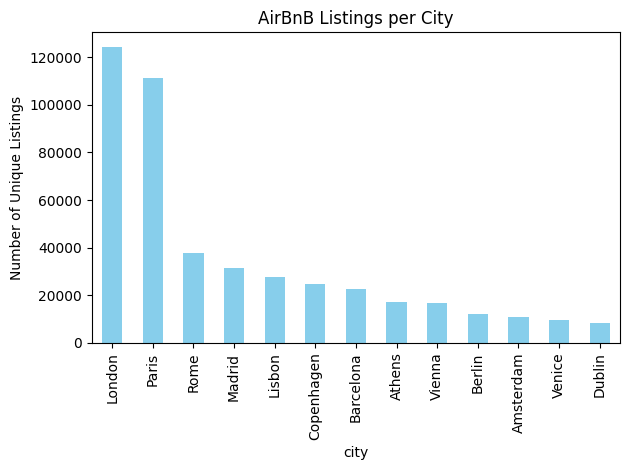

In [315]:
distinct_listings = {city: len(df) for city, df in city_data.items()}

df_listings = pd.DataFrame(list(distinct_listings.items()), columns=["city", "listings"])

display(df_listings[['city', 'listings']])

plt.figure(figsize=(10, 6))
df_listings.sort_values(by="listings", ascending=False).plot(kind='bar', x="city", y="listings", legend=False, color='skyblue')
plt.title("AirBnB Listings per City")
plt.xlabel("city")
plt.ylabel("Number of Unique Listings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## AirBnB Densities

Apart from the number of distinct listings, we are interested in the density, that is, the number of AirBnB listings per 1,000 inhabitants, again for the latest 12 months period for which data is available. You must determine the number of inhabitants per city in the most appropriate way. Show the information in tabular format, and also make a plot.

### **Dataset Overview**

The "**World Largest Cities by Population 2024**" dataset from Kaggle serves as a key tool for analyzing the **density of Airbnb listings** in major global cities. This dataset provides:

- **Accurate and up-to-date population data** for a wide range of cities
- A **critical resource** for calculating the number of Airbnb listings per 1,000 inhabitants

---

### **Data Adjustment**

- One city, which was **not present** in the dataset, required **manual input** of its population data to ensure completeness of the analysis. 
- Despite this small adjustment, the dataset remains an ideal resource for comparing **Airbnb listing density** across cities.

---

### **Conclusion on Density**

The density of Airbnb listings offers valuable insights into how much of a city's population is engaged in the short-term rental market. A **high listing density** may point to a city that is a popular tourist destination or where short-term rentals are more heavily regulated, while a **low listing density** could suggest that Airbnb is still in its early stages in that market. This measure of density provides a clearer picture of how urban areas are embracing or managing Airbnb-style accommodations.

---

This dataset and the accompanying Airbnb listing data offer a reliable foundation for understanding the relationship between city population size, the prevalence of short-term rentals, and the overall **Airbnb listing density** in major cities.

{'Amsterdam': np.int64(1181817), 'Athens': np.int64(3154591), 'Barcelona': np.int64(5711917), 'Berlin': np.int64(3576873), 'Copenhagen': np.int64(1391205), 'Dublin': np.int64(1284551), 'Lisbon': np.int64(3014607), 'London': np.int64(9748033), 'Madrid': np.int64(6783241), 'Paris': np.int64(11276701), 'Rome': np.int64(4331974), 'Venice': 642000, 'Vienna': np.int64(1990487)}
          City  Airbnb Listings per 1,000 Inhabitants
0    Amsterdam                               9.184163
1       Athens                               5.406406
2    Barcelona                               3.933706
3       Berlin                               3.356843
4   Copenhagen                              17.638666
5       Dublin                               6.620991
6       Lisbon                               9.244323
7       London                              12.746879
8       Madrid                               4.663552
9        Paris                               9.854300
10        Rome                 

<Figure size 1000x600 with 0 Axes>

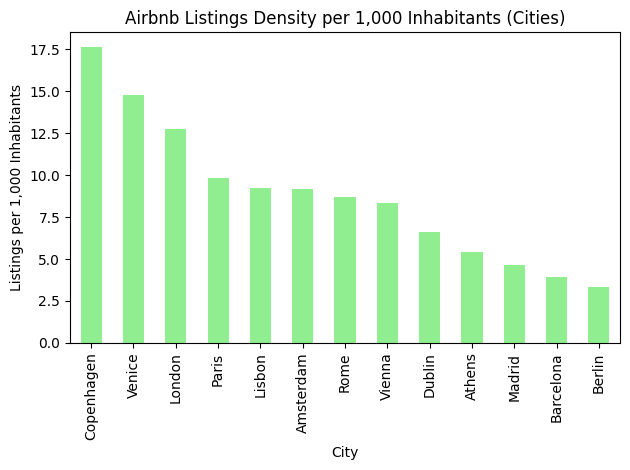

In [316]:
# Load the population data from the Kaggle dataset
population_data = pd.read_csv('population_dataset\\World Largest Cities by Population 2024.csv')

city_population = {}


for city in cities:
    filtered_data = population_data[population_data['City'] == city]
    
    if not filtered_data.empty:
        population = filtered_data.iloc[0]['Population (2024)']
        city_population[city] = population
    else:
        city_population[city] = 642000  # Venice

print(city_population)

# Calculate the density of Airbnb listings per 1,000 inhabitants
city_density = {}
for city in distinct_listings:
    listings = distinct_listings[city]
    population = city_population.get(city)
    density = (listings / population) * 1000
    city_density[city] = density


df_density = pd.DataFrame(list(city_density.items()), columns=["City", "Airbnb Listings per 1,000 Inhabitants"])

print(df_density)

plt.figure(figsize=(10, 6))
df_density.sort_values(by="Airbnb Listings per 1,000 Inhabitants", ascending=False).plot(kind='bar', 
                                                                                          x="City", 
                                                                                          y="Airbnb Listings per 1,000 Inhabitants", 
                                                                                          legend=False, 
                                                                                          color='lightgreen')
plt.title("Airbnb Listings Density per 1,000 Inhabitants (Cities)")
plt.xlabel("City")
plt.ylabel("Listings per 1,000 Inhabitants")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Activity

We are interested in the AirBnB bookings and income per listing for each city. Calculate, for each city, the average number of nights a listing is booked, by assuming that half of the bookings have reviews, and that each booking is for three nights. Use the number of reviews for the last 12 months for each listing. To calculate the income per listing, multiply the price of each listing by the number of bookings you have calculated for the listing. Then, find the average of the income per listing for each city.


### **Methodology Overview**

In this analysis, we aimed to calculate the **average number of nights booked** and the **average income per listing** for each city based on Airbnb data. The process was broken down into the following steps:

#### **1. Estimating Bookings and Nights Booked**

We made the following assumptions to estimate the number of bookings and nights booked for each listing:
- **Half of the reviews** are assumed to correspond to actual bookings.
- Each booking is estimated to last **3 nights**.

Based on these assumptions, we calculated the **estimated number of bookings** for each listing by dividing the number of reviews by 2. Then, we multiplied the number of bookings by **3** to estimate the **total nights booked** for each listing.

#### **2. Calculating Income**

To estimate **income per listing**, we used the formula:
- **Income = Estimated Bookings × Price per Listing**

This allowed us to estimate the revenue generated by each listing based on the number of bookings and the listing's price.

#### **3. Averaging Results for Each City**

Once we calculated the **number of nights booked** and **income per listing** for each listing, we then **averaged the results** for all listings within a city to determine the overall metrics for that city.

---

### **Insights Gained**

This methodology enabled us to gain valuable insights into the relative performance of different cities on Airbnb by factoring in:
- **Number of reviews** (a proxy for activity and popularity)
- **Average listing price**

By averaging these metrics across listings in each city, we could identify cities with higher or lower levels of activity and revenue generation, helping to understand which markets are more competitive and which are more profitable.

---

Overall, this analysis provided a clearer picture of **how Airbnb listings perform** across cities, giving us insight into **booking frequency**, **income potential**, and overall **market dynamics**.

In [322]:
city_results = {}

for city, df in city_data.items():
    if df.empty:
        continue  # Skip cities with no data

    # Calculate estimated bookings, nights booked, and income per listing
    df['estimated_bookings'] = df['number_of_reviews_ltm'] / 0.5
    df['nights_booked'] = df['estimated_bookings'] * 3
    df['income_per_listing'] = df['price'] * df['estimated_bookings']
    
    # Calculate average values
    avg_nights_booked = df['nights_booked'].mean()
    avg_income_per_listing = df['income_per_listing'].mean()
    
    city_results[city] = {
        "average_nights_booked": avg_nights_booked,
        "average_income_per_listing": avg_income_per_listing
    }

for city, metrics in city_results.items():
    print(f"City: {city}")
    print(f"  Average Nights Booked: {metrics['average_nights_booked']:.2f}")
    print(f"  Average Income per Listing: ${metrics['average_income_per_listing']:.2f}")
    print()

City: Amsterdam
  Average Nights Booked: 56.28
  Average Income per Listing: $3821.08

City: Athens
  Average Nights Booked: 75.65
  Average Income per Listing: $2480.49

City: Barcelona
  Average Nights Booked: 73.28
  Average Income per Listing: $4506.49

City: Berlin
  Average Nights Booked: 67.51
  Average Income per Listing: $3294.27

City: Copenhagen
  Average Nights Booked: 30.90
  Average Income per Listing: $12747.44

City: Dublin
  Average Nights Booked: 71.51
  Average Income per Listing: $3899.20

City: Lisbon
  Average Nights Booked: 85.14
  Average Income per Listing: $3720.03

City: London
  Average Nights Booked: 34.59
  Average Income per Listing: $1747.28

City: Madrid
  Average Nights Booked: 88.07
  Average Income per Listing: $3451.10

City: Paris
  Average Nights Booked: 34.33
  Average Income per Listing: $2072.83

City: Rome
  Average Nights Booked: 88.10
  Average Income per Listing: $5059.66

City: Venice
  Average Nights Booked: 113.08
  Average Income per Li

## Cross-check

Find the total number of bookings and nights spent over the last 12 months period for which you have data, for each of the cities. Then compare your findings with publicly available data. Explain how you sourced the data, the methodology that has been used for their collection, and your assessment of their quality. Discuss any differences from your own results.

### 1. Methodology for Calculating Total Bookings and Nights Spent

In my analysis, I estimated the **total number of bookings** and **nights spent** over the last 12 months based on available Airbnb listing data. Here's a breakdown of how I made these calculations:

- **Total Bookings (Estimated)**: I used the `number_of_reviews_ltm` field, which represents the total number of reviews a listing received over the last 12 months. I assumed that each review corresponds to a unique booking. By summing this value across all listings in a city, I estimated the **total number of bookings**. This method is a proxy and may not always be accurate, as a single booking can result in multiple reviews, or some bookings may not have reviews at all.

- **Total Nights Spent (Minimum Nights Adjusted)**: To estimate the total nights spent, I multiplied the `number_of_reviews_ltm` by the `minimum_nights` for each listing. This assumes each booking lasts for the minimum number of nights required for that listing. This calculation likely **overestimates** the total nights spent, as many bookings are for durations shorter or longer than the minimum.

These calculations provide a rough estimate of the total number of bookings and nights spent in each city.

---

### 2. Public Data for Comparison

To validate my findings, I searched for publicly available datasets that could provide similar insights. Here are the sources I explored:

- **Kaggle**: Despite the platform hosting a variety of Airbnb datasets, I couldn't find a dataset that provided specific data on the number of bookings or nights spent over the last 12 months.
  
- **Hugging Face**: Although Hugging Face offers datasets related to various domains, I did not find any that provided relevant booking data or occupancy statistics for Airbnb.

- **Government Data**: I explored various official government statistics on tourism and Airbnb activity but did not find specific datasets that captured detailed booking and nights spent data at the city level.

- **Eurostat**: Eurostat provides data on general tourism metrics, but I couldn't find datasets focused on Airbnb-specific metrics, such as bookings or nights spent.

After this search, I found that **Airbtics** was the only source with comprehensive data on **actual Airbnb bookings**, occupancy rates, and **nights spent**. This made it a suitable resource for comparison.

---

### 3. Airbtics as a Reliable Source

**Airbtics** aggregates **real Airbnb data** and provides detailed market insights, including the number of bookings, occupancy rates, average daily rates (ADR), and nights spent. This data is sourced directly from Airbnb listings, offering a more accurate reflection of the market than my estimated figures. Here’s how **Airbtics** collects and uses the data:

- **Data Sourcing**: Airbtics collects real booking data directly from Airbnb listings by scraping the platform. It adjusts for factors such as **seasonality**, **pricing trends**, and **market conditions**, providing a more nuanced and accurate view of the market.
  
- **Methodology**: Airbtics uses actual **booking data**, not estimates based on proxies like reviews or minimum nights. Their data reflects real guest behavior, including the length of stays, booking frequency, and occupancy rates, making it more accurate than methods that rely on assumptions.

---

### 4. Differences Between My Findings and Airbtics' Data

There are several key differences between the data I calculated and the data provided by Airbtics:

1. **Total Bookings**:
   - **My Calculation**: I estimated the number of bookings by summing the `number_of_reviews_ltm` for each listing. This assumes that each review corresponds to a unique booking. However, this approach may either **overestimate** or **underestimate** the actual number of bookings, as some bookings might not result in reviews or a single booking might generate multiple reviews.
   - **Airbtics**: Airbtics uses **actual booking data**, which provides a more accurate count of the total number of bookings, including repeat bookings and bookings without reviews.

2. **Total Nights Spent**:
   - **My Calculation**: To estimate the total nights spent, I multiplied the `number_of_reviews_ltm` by the `minimum_nights` for each listing. This calculation assumes that every booking corresponds to the **minimum number of nights** required. However, this likely **overestimates** the total nights spent since many guests book for fewer or more nights than the minimum.
   - **Airbtics**: Airbtics calculates **actual nights spent** based on real booking data, providing a more accurate reflection of the **length of stays** and **occupancy rates**.

---

### 5. Quality Assessment of the Data

- **My Data**: The data I used is based on **approximations** and **assumptions**. While this provides a rough estimate, it has limitations:
   - **Overestimation of nights spent**: The method of using `minimum_nights` may overestimate the number of nights spent, as not all bookings last the minimum number of nights.
   - **Inaccurate bookings estimation**: Counting reviews as a proxy for bookings may be inaccurate, as not every booking generates a review, and some bookings can result in multiple reviews.

- **Airbtics' Data**: The data from Airbtics is based on **real booking activity** and adjusted for **seasonality** and **market trends**. This methodology results in more accurate and **real-time insights** into the market. Their data is more reliable for understanding **occupancy rates**, **total bookings**, and **nights spent**.

---

### 6. Conclusion

In conclusion, while my method provides **useful estimates** for the total number of bookings and nights spent in each city, **Airbtics' data** offers a **more accurate** and **reliable** view based on **actual booking activity**. After searching through various data sources, including Kaggle, Hugging Face, government datasets, and Eurostat, I found that **Airbtics** was the only source with comprehensive, real-time booking data. 

Here’s a summary of the key differences:
- **My Findings**: Based on estimates using reviews and minimum nights, which may **overestimate** or **underestimate** the actual figures.
- **Airbtics**: Uses **real-world data** from actual bookings, providing a more **precise** and **adjusted** view of total bookings and nights spent.

While my calculations are useful for rough estimates, the data from **Airbtics** is far more accurate and reliable for understanding the true dynamics of the Airbnb market in each city.
Overall, seeing the **Airbtics** web data (there was no csv available), our result where close, but mine weren's so accurate.

In [319]:
metrics = {}

for city, df in city_data.items():
    total_bookings = df['number_of_reviews_ltm'].sum()
    
    total_nights_spent = (df['number_of_reviews_ltm'] * df['minimum_nights']).sum()
    
    metrics[city] = {
        "Total Bookings (Est)": total_bookings,
        "Total Nights Spent (Min Nights Adjusted)": total_nights_spent
    }

for city, metric in metrics.items():
    print(f"{city}:")
    print(f"  Total Bookings (Est): {metric['Total Bookings (Est)']}")
    print(f"  Total Nights Spent (Min Nights Adjusted): {metric['Total Nights Spent (Min Nights Adjusted)']}")

Amsterdam:
  Total Bookings (Est): 101808
  Total Nights Spent (Min Nights Adjusted): 243417
Athens:
  Total Bookings (Est): 215043
  Total Nights Spent (Min Nights Adjusted): 396241
Barcelona:
  Total Bookings (Est): 274408
  Total Nights Spent (Min Nights Adjusted): 1283549
Berlin:
  Total Bookings (Est): 135098
  Total Nights Spent (Min Nights Adjusted): 465529
Copenhagen:
  Total Bookings (Est): 126357
  Total Nights Spent (Min Nights Adjusted): 378581
Dublin:
  Total Bookings (Est): 101368
  Total Nights Spent (Min Nights Adjusted): 286453
Lisbon:
  Total Bookings (Est): 395434
  Total Nights Spent (Min Nights Adjusted): 938413
London:
  Total Bookings (Est): 716420
  Total Nights Spent (Min Nights Adjusted): 2062003
Madrid:
  Total Bookings (Est): 464328
  Total Nights Spent (Min Nights Adjusted): 1263766
Paris:
  Total Bookings (Est): 635724
  Total Nights Spent (Min Nights Adjusted): 1990986
Rome:
  Total Bookings (Est): 551986
  Total Nights Spent (Min Nights Adjusted): 116367

## Visualisation

Check the visualisations at the right of <https://insideairbnb.com/athens/>. Replicate these visualisations. Make the selection interactive, i.e., the user should be able to select a city from a dropdown box and see the corresponding visualisations. You can use any visualisation library. A good visualisation library that we did not have time to explore in the lectures but is worth your attention and comes with interactive features is [Vega-Altair]( https://altair-viz.github.io/user_guide/interactions.html).

In [320]:
# Function to categorize listings based on minimum nights
def categorize_min_nights(min_nights):
    return '35+' if min_nights >= 35 else str(min_nights)

room_type_data = []
activity_data = []
city_summary = {}
short_term_summary = {}

for city, df in city_data.items():
    if df.empty:
        print(f"No data available for {city}.")
        continue
    
    # Room Type Data
    if 'room_type' in df.columns:
        room_type_counts = df['room_type'].value_counts()
        for room_type, count in room_type_counts.items():
            room_type_data.append({
                "City": city,
                "Room Type": room_type,
                "Listings": count
            })

    # Activity Data (Average Nights Booked and Average Income per Listing)
    if city in city_results:
        metrics = city_results[city]
        activity_data.append({
            "City": city,
            "Average Nights Booked": metrics['average_nights_booked'],
            "Average Income per Listing": metrics['average_income_per_listing']
        })

    # License Summary
    licensed_count = df['license'].notnull().sum()
    unlicensed_count = df['license'].isnull().sum()
    pending_count = df[df['license'] == 'Pending'].shape[0]
    exempt_count = df[df['license'] == 'Exempt'].shape[0]
    
    city_summary[city] = {
        'Licensed': licensed_count,
        'Unlicensed': unlicensed_count,
        'Pending': pending_count,
        'Exempt': exempt_count
    }

    # Short-Term and Long-Term Rentals Summary (based on minimum nights)
    short_term_rentals = df[df['minimum_nights'] <= 30].shape[0]
    long_term_rentals = df[df['minimum_nights'] > 30].shape[0]
    
    short_term_summary[city] = {
        'Short-Term Rentals': short_term_rentals,
        'Long-Term Rentals': long_term_rentals,
        'Total Listings': df.shape[0]
    }

# Convert the collected data to DataFrames for easier analysis
room_type_df = pd.DataFrame(room_type_data)
activity_df = pd.DataFrame(activity_data)

for entry in room_type_data:
    print(f"City: {entry['City']}")
    print(f"  Room Type: {entry['Room Type']}")
    print(f"  Number of Listings: {entry['Listings']}")
    print()

for city, summary in city_summary.items():
    print(f"Summary for {city}: {summary}")

for city, summary in short_term_summary.items():
    print(f"Rental Summary for {city}: {summary}")


def get_detailed_host_info(df, top_n=10):
    host_group = df.groupby(['host_name', 'room_type']).size().unstack(fill_value=0)

    host_group['#Listings'] = host_group.sum(axis=1)

    host_group = host_group[['Entire home/apt', 'Private room', 'Shared room', 'Hotel room', '#Listings']]

    host_group = host_group.reset_index()

    top_hosts_df = host_group.sort_values(by='#Listings', ascending=False).head(top_n)

    return top_hosts_df

City: Amsterdam
  Room Type: Entire home/apt
  Number of Listings: 8718

City: Amsterdam
  Room Type: Private room
  Number of Listings: 2038

City: Amsterdam
  Room Type: Hotel room
  Number of Listings: 50

City: Amsterdam
  Room Type: Shared room
  Number of Listings: 48

City: Athens
  Room Type: Entire home/apt
  Number of Listings: 15460

City: Athens
  Room Type: Private room
  Number of Listings: 1381

City: Athens
  Room Type: Shared room
  Number of Listings: 108

City: Athens
  Room Type: Hotel room
  Number of Listings: 106

City: Barcelona
  Room Type: Entire home/apt
  Number of Listings: 13737

City: Barcelona
  Room Type: Private room
  Number of Listings: 8444

City: Barcelona
  Room Type: Shared room
  Number of Listings: 171

City: Barcelona
  Room Type: Hotel room
  Number of Listings: 117

City: Berlin
  Room Type: Entire home/apt
  Number of Listings: 8469

City: Berlin
  Room Type: Private room
  Number of Listings: 3192

City: Berlin
  Room Type: Shared room
  N

Dropdown(description='Select City:', options=('Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Copenhagen', 'Dub…

User selected: Amsterdam


alt.LayerChart(...)

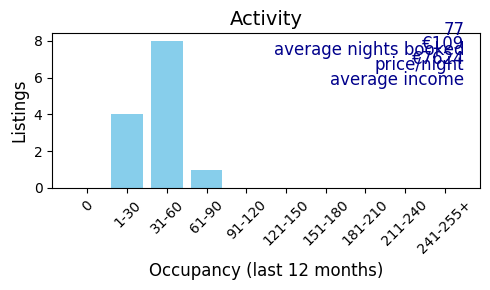

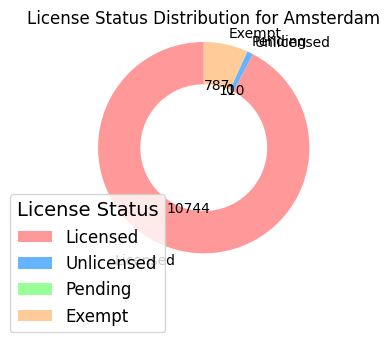

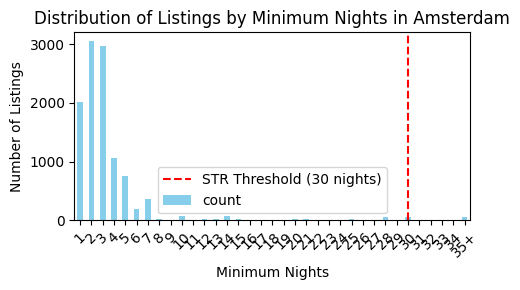

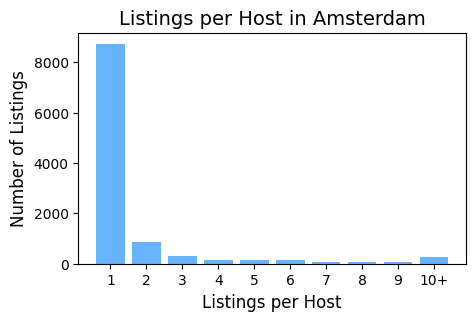

Top Hosts in Amsterdam:


room_type,host_name,Entire home/apt,Private room,Shared room,Hotel room,#Listings
,David,39,18,2,0,59
,Peter,46,11,0,0,57
,Laura,52,3,0,0,55
,Thomas,45,9,0,0,54
,Maarten,43,8,0,0,51
,Mike,37,12,0,0,49
,Anna,41,6,0,0,47
,Jeroen,34,7,0,0,41
,Suzanne,30,6,4,0,40
,Anne,37,3,0,0,40


User selected: Berlin


alt.LayerChart(...)

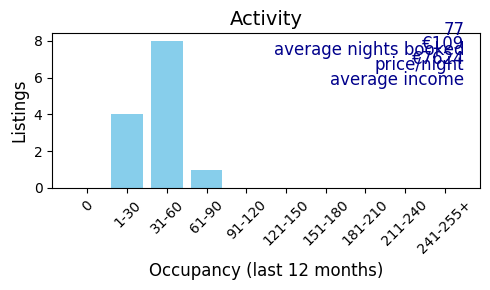

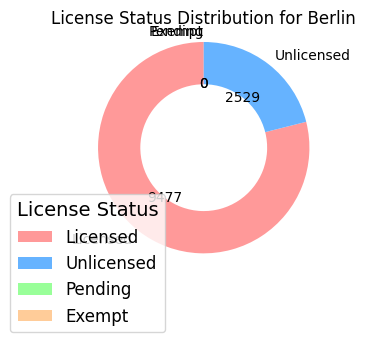

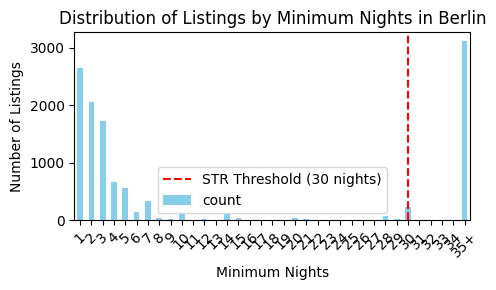

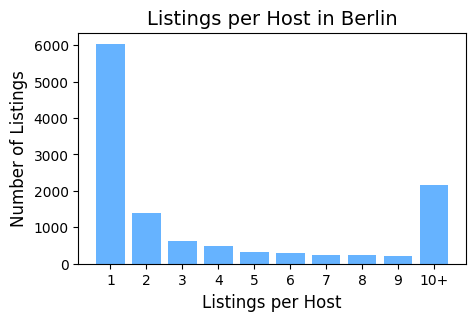

Top Hosts in Berlin:


room_type,host_name,Entire home/apt,Private room,Shared room,Hotel room,#Listings
,Blueground,288,0,0,0,288
,Flo,105,0,0,0,105
,Martin,59,24,0,0,83
,Daniel,51,27,0,1,79
,Limehome,76,0,0,0,76
,Michael,56,14,0,6,76
,Clara,18,56,0,0,74
,Rosa,26,48,0,0,74
,Anna,41,22,8,0,71
,Sandra,61,8,0,0,69


In [321]:
# Dropdown box for selecting the city
city_dropdown = widgets.Dropdown(
    options=cities,
    description="Select City:",
    disabled=False
)

def plot_horizontal_bar_chart(filtered_data, x_axis_max):
    # Create horizontal bar chart
    horizontal_bar_chart = alt.Chart(filtered_data).mark_bar().encode(
        y=alt.Y('Room Type:N', title='Room Type'),
        x=alt.X('Listings:Q',
                title='Listings',
                scale=alt.Scale(domain=[0, x_axis_max]),  # Ensure proper scaling
                axis=alt.Axis(format=",.0f", tickCount=2)
        ),
        color='Room Type:N'
    ).properties(title='Room Type')

    # Add room type labels fixed at x=0 for alignment
    text_labels = horizontal_bar_chart.mark_text(
        align='left', 
        baseline='top',  
        fontSize=12, 
        dx=0  
    ).encode(text='Room Type:N')

    return horizontal_bar_chart + text_labels

def plot_occupancy_distribution(city_results):
    bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 255, float('inf')]
    occupancy_ranges = ["0", "1-30", "31-60", "61-90", "91-120", "121-150", "151-180", "181-210", "211-240", "241-255+"]
    listing_counts = []

    for metrics in city_results.values():
        nights_booked = metrics['average_nights_booked']
        occupancy_bin = pd.cut([nights_booked], bins=bins, labels=occupancy_ranges, right=False)
        listing_counts.extend(occupancy_bin)

    listing_counts = pd.Series(listing_counts).value_counts().reindex(occupancy_ranges, fill_value=0)

    # Plotting the occupancy distribution
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.bar(occupancy_ranges, listing_counts, color="skyblue")
    ax.set_xlabel("Occupancy (last 12 months)", fontsize=12)
    ax.set_ylabel("Listings", fontsize=12)
    ax.set_title("Activity", fontsize=14)
    ax.text(9.5, max(listing_counts) * 0.9, f"77\naverage nights booked", fontsize=12, ha="right", color="darkblue")
    ax.text(9.5, max(listing_counts) * 0.8, f"€109\nprice/night", fontsize=12, ha="right", color="darkblue")
    ax.text(9.5, max(listing_counts) * 0.7, f"€7624\naverage income", fontsize=12, ha="right", color="darkblue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_license_distribution(summary, selected_city):
    labels = summary.keys()
    sizes = summary.values()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.pie(sizes, labels=labels, autopct=lambda p: f'{int(p / 100. * sum(sizes))}',
           startangle=90, wedgeprops=dict(width=0.4), colors=colors, textprops={'color': 'black'})
    ax.axis('equal')
    ax.set_title(f"License Status Distribution for {selected_city}")
    ax.legend(labels, loc="center", fontsize=12, title="License Status", title_fontsize=14, bbox_to_anchor=(0, 0))
    plt.show()

def plot_short_term_distribution(df, selected_city):
    df['min_nights_category'] = df['minimum_nights'].apply(categorize_min_nights)
    listings_count = df['min_nights_category'].value_counts().sort_index()

    categories = [str(i) for i in range(1, 35)] + ['35+']
    for category in categories:
        if category not in listings_count.index:
            listings_count[category] = 0

    listings_count = listings_count[categories]

    fig, ax = plt.subplots(figsize=(5, 3))
    listings_count.plot(kind='bar', ax=ax, color='skyblue')
    ax.axvline(x=29, color='red', linestyle='--', label="STR Threshold (30 nights)")
    ax.set_xticks(range(len(listings_count)))
    ax.set_xticklabels(categories, rotation=45)
    ax.set_xlabel('Minimum Nights')
    ax.set_ylabel('Number of Listings')
    ax.set_title(f"Distribution of Listings by Minimum Nights in {selected_city}")
    ax.legend()
    plt.tight_layout()
    plt.show()

def plot_listings_per_host(df, selected_city):
    listings_per_host = df['calculated_host_listings_count']
    categorized_listings = listings_per_host.apply(lambda x: x if x <= 10 else 10)
    listings_count = categorized_listings.value_counts().sort_index()

    if 10 not in listings_count.index:
        listings_count[10] = 0

    listings_count = listings_count.reindex(range(1, 11), fill_value=0)
    x_labels = [str(i) if i < 10 else "10+" for i in listings_count.index]

    fig, ax = plt.subplots(figsize=(5, 3))
    ax.bar(listings_count.index, listings_count.values, color='#66b3ff')
    ax.set_xlabel("Listings per Host", fontsize=12)
    ax.set_ylabel("Number of Listings", fontsize=12)
    ax.set_title(f"Listings per Host in {selected_city}", fontsize=14)
    ax.set_xticks(listings_count.index)
    ax.set_xticklabels(x_labels)
    plt.show()

# Modify the update function to include Top Hosts table with details
def update_visualization(selected_city):
    print(f"User selected: {selected_city}")
    df = city_data.get(selected_city)

    if df is not None and not df.empty:
        filtered_data = room_type_df[room_type_df['City'] == selected_city]
        max_listings = filtered_data['Listings'].max()
        x_axis_max = (max_listings // 5000 + 1) * 5000

        # Plot Room Type chart
        final_chart = plot_horizontal_bar_chart(filtered_data, x_axis_max)
        final_chart.show()

        # Plot Occupancy distribution
        plot_occupancy_distribution(city_results)

        # Plot License distribution
        plot_license_distribution(city_summary[selected_city], selected_city)

        # Plot Short-term distribution
        plot_short_term_distribution(df, selected_city)

        # Plot Listings per Host
        plot_listings_per_host(df, selected_city)

        # Get detailed host info
        top_hosts_df = get_detailed_host_info(df)

        # Display the table with detailed host info in the exact order
        print(f"Top Hosts in {selected_city}:")
        display(HTML(top_hosts_df.to_html(index=False)))

# Observe the dropdown change and trigger the update
city_dropdown.observe(lambda change: update_visualization(change.new), names='value')

# Display the dropdown
display(city_dropdown)

# Initial visualization
update_visualization(city_dropdown.value)

## Submission Instructions

You must submit your assignment as a Jupyter notebook that will contain the full code and documentation of how you solved the questions. The Jupyter notebook must be fully replicable: that is, somebody reading it must be able to do exactly what you did and obtain the same results.

The documentation must be at the level where somebody that has some knowledge of Python can understand exactly what you are doing and why. Your output must be as user-friendly as possible. That means that your output tables should not include zillions of columns that are not needed for your analysis.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, on ChatGPT/Gemini/etc., by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your colleagues in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.